In [14]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
import descartes
import glob
import os
import json
import topojson

ModuleNotFoundError: No module named 'topojson'

In [4]:
file_path = './data/polygons.json'

with open(file_path) as file:
    rows = file.readlines()

In [5]:
rows

['{"type":"Topology","arcs":[[[143349,91897],[154,-47],[101,40],[41,-27],[102,-95],[-11,-72],[-29,-34],[-60,27],[-11,-48],[-203,-13],[-71,-54],[-75,10],[-67,71],[24,51],[-29,56],[-28,18],[35,54],[52,11],[16,51],[59,1]],[[155508,100130],[0,-76],[-191,1],[-5,68],[49,68],[46,-45],[101,-16]],[[141783,67984],[375,-17],[70,-13],[-7,-153],[-440,-3],[2,186]],[[150632,111080],[631,-11],[-4,-266],[-173,-1],[4,74],[-121,1],[-3,-74],[-339,0],[5,277]],[[158482,99177],[-3,-32],[-55,-102],[-49,3],[-36,43],[32,57],[137,76],[-26,-45]],[[160408,105188],[3,-87],[-47,-66],[8,-20],[-58,-52],[-39,-4],[-55,-54],[-60,-26],[-100,-109],[-47,-9],[-82,7],[-43,-10],[27,91],[0,71],[67,5],[35,28],[57,20],[-4,61],[-29,68],[9,50],[30,12],[54,-42],[-3,-75],[41,-52],[25,-10],[52,40],[24,67],[-38,42],[-101,58],[9,40],[38,4],[140,-56],[27,24],[13,48],[39,-26],[8,-38]],[[140404,115307],[-17,-145],[-173,0],[-70,131],[35,65],[225,-51]],[[140503,114200],[0,143],[58,33],[123,0],[73,44],[75,-22],[96,22],[62,-11],[44,-121],[9,-1

In [11]:
type(rows)

list

In [12]:
len(rows)

1

In [13]:
header = rows[:1]

In [16]:
polygon = gpd.read_file('data/polygons.json')
polygon.head()

IndexError: list index out of range

In [17]:
polygon = gpd.read_file('data/merge_files_sim.csv')
polygon.head()

NAME                  DESIG_ENG DESIG_TYPE      IUCN_CAT  \
0      La Calera  Nature Reserve of Defense   National  Not Reported   
1        Mbotaby         Ecological Reserve   National            VI   
2        La Loca             Nature Reserve   National            VI   
3  Pichi Mahuida             Nature Reserve   National            VI   
4  Loro Hablador         Provincial Reserve   National            IV   

         INT_CRIT      STATUS STATUS_YR  \
0  Not Applicable  Designated      2009   
1  Not Applicable  Designated      1991   
2  Not Applicable  Designated      1969   
3  Not Applicable  Designated      1974   
4  Not Applicable  Designated      1998   

                                 GOV_TYPE ISO3 geometry  
0  Federal or national ministry or agency  ARG     None  
1                            Not Reported  ARG     None  
2                            Not Reported  ARG     None  
3         Sub-national ministry or agency  ARG     None  
4                            Not Reported  ARG     None

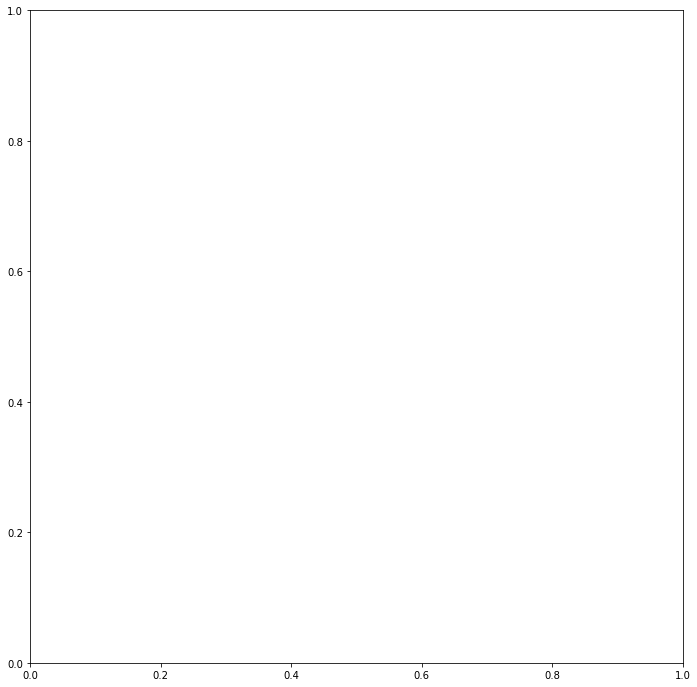

In [18]:
ax = polygon.plot(figsize=(12,12));

In [19]:
type(polygon)

geopandas.geodataframe.GeoDataFrame

In [20]:
len(polygon)

4643

In [21]:
polygon.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4643 entries, 0 to 4642
Data columns (total 10 columns):
NAME          4643 non-null object
DESIG_ENG     4643 non-null object
DESIG_TYPE    4643 non-null object
IUCN_CAT      4643 non-null object
INT_CRIT      4643 non-null object
STATUS        4643 non-null object
STATUS_YR     4643 non-null object
GOV_TYPE      4643 non-null object
ISO3          4643 non-null object
geometry      0 non-null object
dtypes: object(10)
memory usage: 362.8+ KB


In [22]:
polygon.describe()

NAME        DESIG_ENG DESIG_TYPE      IUCN_CAT  \
count           4643             4643       4643          4643   
unique          4415              196          3            10   
top     La Esperanza  Indigenous Area   National  Not Reported   
freq              13              700       4492          1994   

              INT_CRIT      STATUS STATUS_YR                         GOV_TYPE  \
count             4643        4643      4643                             4643   
unique              57           3        94                               11   
top     Not Applicable  Designated      2008  Sub-national ministry or agency   
freq              4533        4377       235                             1400   

        ISO3  geometry  
count   4643       0.0  
unique    13       0.0  
top      BRA       NaN  
freq    2280       NaN

In [24]:
polygon['DESIG_ENG'].describe()

count                4643
unique                196
top       Indigenous Area
freq                  700
Name: DESIG_ENG, dtype: object

In [25]:
polygon.head()

NAME                  DESIG_ENG DESIG_TYPE      IUCN_CAT  \
0      La Calera  Nature Reserve of Defense   National  Not Reported   
1        Mbotaby         Ecological Reserve   National            VI   
2        La Loca             Nature Reserve   National            VI   
3  Pichi Mahuida             Nature Reserve   National            VI   
4  Loro Hablador         Provincial Reserve   National            IV   

         INT_CRIT      STATUS STATUS_YR  \
0  Not Applicable  Designated      2009   
1  Not Applicable  Designated      1991   
2  Not Applicable  Designated      1969   
3  Not Applicable  Designated      1974   
4  Not Applicable  Designated      1998   

                                 GOV_TYPE ISO3 geometry  
0  Federal or national ministry or agency  ARG     None  
1                            Not Reported  ARG     None  
2                            Not Reported  ARG     None  
3         Sub-national ministry or agency  ARG     None  
4                            Not Reported  ARG     None

In [26]:
country = polygon['ISO3']
country

0       ARG
1       ARG
2       ARG
3       ARG
4       ARG
5       ARG
6       ARG
7       ARG
8       ARG
9       ARG
10      ARG
11      ARG
12      ARG
13      ARG
14      ARG
15      ARG
16      ARG
17      ARG
18      ARG
19      ARG
20      ARG
21      ARG
22      ARG
23      ARG
24      ARG
25      ARG
26      ARG
27      ARG
28      ARG
29      ARG
       ... 
4613    VEN
4614    VEN
4615    VEN
4616    VEN
4617    VEN
4618    VEN
4619    VEN
4620    VEN
4621    VEN
4622    VEN
4623    VEN
4624    VEN
4625    VEN
4626    VEN
4627    VEN
4628    VEN
4629    VEN
4630    VEN
4631    VEN
4632    VEN
4633    VEN
4634    VEN
4635    VEN
4636    VEN
4637    VEN
4638    VEN
4639    VEN
4640    VEN
4641    VEN
4642    VEN
Name: ISO3, Length: 4643, dtype: object

In [27]:
type(country)

pandas.core.series.Series

In [30]:
polygon['DESIG_ENG']

0                    Nature Reserve of Defense
1                           Ecological Reserve
2                               Nature Reserve
3                               Nature Reserve
4                           Provincial Reserve
5                     Municipal Nature Reserve
6                              Provincial Park
7                              Provincial Park
8                           Provincial Reserve
9                         Multiple Use Reserve
10                             Provincial Park
11                             Private Reserve
12                       Municipal Nature Park
13                             Provincial Park
14                       Municipal Nature Park
15                       Municipal Nature Park
16                             Private Reserve
17                              Nature Reserve
18                           Municipal Reserve
19                 Multiple Use Nature Reserve
20                           Fisheries Reserve
21           

In [31]:
df = pd.read_csv('./data/merge_files_sim.csv')
df.head

<bound method NDFrame.head of                                          NAME  \
0                                   La Calera   
1                                     Mbotaby   
2                                     La Loca   
3                               Pichi Mahuida   
4                               Loro Hablador   
5                           Isla de Las Damas   
6                            Isla Del Cerrito   
7                             Potrero de Yala   
8                                  Los Diques   
9                                  Cerro Azul   
10        Salto Encantado Valle Ao. Cuña Piru   
11               Santa Maria del Aguaray mini   
12                  Lote "C" Huerto Municipal   
13                                  Esperanza   
14                          Paraje los Indios   
15                             Amado Bonpland   
16                                 Aguaray-mí   
17                                   Los Sosa   
18                     Islote Muicipal 

In [32]:
df['DESIG_ENG'].describe()

count                4643
unique                196
top       Indigenous Area
freq                  700
Name: DESIG_ENG, dtype: object

In [33]:
argentina = df.loc[df['ISO3'] == 'ARG']
argentina.head()

NAME                  DESIG_ENG DESIG_TYPE      IUCN_CAT  \
0      La Calera  Nature Reserve of Defense   National  Not Reported   
1        Mbotaby         Ecological Reserve   National            VI   
2        La Loca             Nature Reserve   National            VI   
3  Pichi Mahuida             Nature Reserve   National            VI   
4  Loro Hablador         Provincial Reserve   National            IV   

         INT_CRIT      STATUS  STATUS_YR  \
0  Not Applicable  Designated       2009   
1  Not Applicable  Designated       1991   
2  Not Applicable  Designated       1969   
3  Not Applicable  Designated       1974   
4  Not Applicable  Designated       1998   

                                 GOV_TYPE ISO3  
0  Federal or national ministry or agency  ARG  
1                            Not Reported  ARG  
2                            Not Reported  ARG  
3         Sub-national ministry or agency  ARG  
4                            Not Reported  ARG

In [39]:
argentina = df.loc[df['ISO3'] == 'ARG']
total = argentina[['DESIG_ENG', 'IUCN_CAT']]
total

DESIG_ENG        IUCN_CAT
0                           Nature Reserve of Defense    Not Reported
1                                  Ecological Reserve              VI
2                                      Nature Reserve              VI
3                                      Nature Reserve              VI
4                                  Provincial Reserve              IV
5                            Municipal Nature Reserve              VI
6                                     Provincial Park              IV
7                                     Provincial Park              II
8                                  Provincial Reserve              VI
9                                Multiple Use Reserve              VI
10                                    Provincial Park              II
11                                    Private Reserve              VI
12                              Municipal Nature Park              VI
13                                    Provincial Park              II
14                              Municipal Nature Park              II
15                              Municipal Nature Park              II
16                                    Private Reserve              VI
17                                     Nature Reserve              VI
18                                  Municipal Reserve              VI
19                        Multiple Use Nature Reserve              VI
20                                  Fisheries Reserve              VI
21                                     Private Refuge              Ia
22                                     Private Refuge              VI
23                            Private Wildlife Refuge              VI
24                          Intangible Nature Reserve              IV
25                                  Fisheries Reserve              VI
26                                 Provincial Reserve              VI
27             World Heritage Site (natural or mixed)              II
28                       UNESCO-MAB Biosphere Reserve  Not Applicable
29                       UNESCO-MAB Biosphere Reserve  Not Applicable
..                                                ...             ...
354  Ramsar Site, Wetland of International Importance    Not Reported
355  Ramsar Site, Wetland of International Importance    Not Reported
356  Ramsar Site, Wetland of International Importance    Not Reported
357  Ramsar Site, Wetland of International Importance    Not Reported
358  Ramsar Site, Wetland of International Importance    Not Reported
359  Ramsar Site, Wetland of International Importance    Not Reported
360  Ramsar Site, Wetland of International Importance    Not Reported
361  Ramsar Site, Wetland of International Importance    Not Reported
362  Ramsar Site, Wetland of International Importance    Not Reported
363  Ramsar Site, Wetland of International Importance    Not Reported
364  Ramsar Site, Wetland of International Importance    Not Reported
365  Ramsar Site, Wetland of International Importance    Not Reported
366  Ramsar Site, Wetland of International Importance    Not Reported
367  Ramsar Site, Wetland of International Importance    Not Reported
368  Ramsar Site, Wetland of International Importance               V
369                                    Nature Reserve              VI
370                                    Nature Reserve              VI
371         Multiple Use Municipal Ecological Reserve              VI
372                             Natural Water Reserve              VI
373                      UNESCO-MAB Biosphere Reserve  Not Applicable
374                      UNESCO-MAB Biosphere Reserve  Not Applicable
375            World Heritage Site (natural or mixed)  Not Applicable
376            World Heritage Site (natural or mixed)  Not Applicable
377            World Heritage Site (natural or mixed)  Not Applicable
378            World Heritage Site (natural or mixed)  Not Applicable
379                                     National Park 

In [41]:
argentina = df.loc[df['ISO3'] == 'ARG']
total = argentina[['DESIG_ENG', 'IUCN_CAT']]
for t in total:
    print(t)

DESIG_ENG
IUCN_CAT


In [43]:
argentina = df.loc[df['ISO3'] == 'ARG']
total = argentina[['DESIG_ENG', 'IUCN_CAT']]
total.count

<bound method DataFrame.count of                                             DESIG_ENG        IUCN_CAT
0                           Nature Reserve of Defense    Not Reported
1                                  Ecological Reserve              VI
2                                      Nature Reserve              VI
3                                      Nature Reserve              VI
4                                  Provincial Reserve              IV
5                            Municipal Nature Reserve              VI
6                                     Provincial Park              IV
7                                     Provincial Park              II
8                                  Provincial Reserve              VI
9                                Multiple Use Reserve              VI
10                                    Provincial Park              II
11                                    Private Reserve              VI
12                              Municipal Nature Park    

In [44]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [45]:
argentina = df.loc[df['ISO3'] == 'ARG']
total = argentina[['DESIG_ENG', 'IUCN_CAT']]
total.groupby('DESIG_ENG')

In [46]:
import seaborn as sns

In [62]:
argentina = df.loc[df['ISO3'] == 'ARG']
areas = argentina['DESIG_ENG'].unique()
areas.sort()
print('Sorted list:', areas)

Sorted list: ['Archaeological Park' 'Cultural Nature Reserve'
 'Cultural and Nature Reserve' 'Ecological Reserve'
 'Ecological and Forest Reserve' 'Educational Nature Reserve'
 'Experimental Area' 'Fisheries Reserve' 'Flora and Fauna Reserve'
 'Flora and Fauna Reserve with Managed Resources' 'Forest Reserve'
 'Hemispheric Shorebird Reserve' 'Hunting Reserve' 'Hydrological Reserve'
 'Ichthyic Reserve' 'Intangible Nature Reserve' 'Integral Nature Reserve'
 'Interjurisdictional Coastal Marine Park'
 'Interjurisdictional Marine Park'
 'Limited Use Area Under Special Protection' 'Managed Nature Reserve'
 'Marine Protected Area' 'Mixed Integral Nature Reserve'
 'Multiple Use Municipal Ecological Reserve' 'Multiple Use Nature Reserve'
 'Multiple Use Provincial Reserve' 'Multiple Use Reserve'
 'Municipal Nature Park' 'Municipal Nature Reserve' 'Municipal Reserve'
 'National Park' 'National Reserve' 'Natural Water Reserve'
 'Nature Fauna Reserve' 'Nature Forest Reserve'
 'Nature Historical and 

In [64]:
argentina = df.loc[df['ISO3'] == 'ARG']
areas = argentina['DESIG_ENG'].unique()


ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [70]:
data = df
print(data)

                                         NAME  \
0                                   La Calera   
1                                     Mbotaby   
2                                     La Loca   
3                               Pichi Mahuida   
4                               Loro Hablador   
5                           Isla de Las Damas   
6                            Isla Del Cerrito   
7                             Potrero de Yala   
8                                  Los Diques   
9                                  Cerro Azul   
10        Salto Encantado Valle Ao. Cuña Piru   
11               Santa Maria del Aguaray mini   
12                  Lote "C" Huerto Municipal   
13                                  Esperanza   
14                          Paraje los Indios   
15                             Amado Bonpland   
16                                 Aguaray-mí   
17                                   Los Sosa   
18                     Islote Muicipal Curupi   
19                  

In [71]:
data = sns.load_dataset('')

HTTPError: HTTP Error 404: Not Found

In [74]:
import seaborn as sns

In [76]:
df = pd.read_csv('data/merge_files_sim.csv', index_col=0)
df.head()

DESIG_ENG DESIG_TYPE      IUCN_CAT  \
NAME                                                                
La Calera      Nature Reserve of Defense   National  Not Reported   
Mbotaby               Ecological Reserve   National            VI   
La Loca                   Nature Reserve   National            VI   
Pichi Mahuida             Nature Reserve   National            VI   
Loro Hablador         Provincial Reserve   National            IV   

                     INT_CRIT      STATUS  STATUS_YR  \
NAME                                                   
La Calera      Not Applicable  Designated       2009   
Mbotaby        Not Applicable  Designated       1991   
La Loca        Not Applicable  Designated       1969   
Pichi Mahuida  Not Applicable  Designated       1974   
Loro Hablador  Not Applicable  Designated       1998   

                                             GOV_TYPE ISO3  
NAME                                                        
La Calera      Federal or national ministry or agency  ARG  
Mbotaby                                  Not Reported  ARG  
La Loca                                  Not Reported  ARG  
Pichi Mahuida         Sub-national ministry or agency  ARG  
Loro Hablador                            Not Reported  ARG

TypeError: Could not convert ARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBOLBRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRABRACHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCHLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLCOLECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUECUGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUFGUYGUYGUYGUYGUYGUYPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPERPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYPRYSURSURSURSURSURSURSURSURSURSURSURSURSURSURSURSURSURSURSURSURSURURYURYURYURYURYURYURYURYURYURYURYURYURYURYURYURYURYURYURYURYURYURYVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVENVEN to numeric

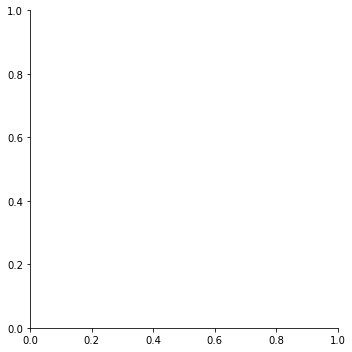

In [81]:
df.columns

Index(['DESIG_ENG', 'DESIG_TYPE', 'IUCN_CAT', 'INT_CRIT', 'STATUS',
       'STATUS_YR', 'GOV_TYPE', 'ISO3'],
      dtype='object')

In [87]:
col_list = list(df.columns)
num_list = []

for item in col_list:
    try:
        int(item)
        num_list.append(item)
    except ValueError:
        pass
        
        df['sum'] = df[num_list].sum(axis=1)
         df.head()
        

IndentationError: unexpected indent (<ipython-input-87-98148fd86028>, line 12)

In [105]:
argentina = df.loc[df['ISO3'] == 'ARG']
unesco = argentina['DESIG_ENG'] == 'UNESCO-MAB Biosphere Reserve'
print(unesco)

NAME
La Calera                                            False
Mbotaby                                              False
La Loca                                              False
Pichi Mahuida                                        False
Loro Hablador                                        False
Isla de Las Damas                                    False
Isla Del Cerrito                                     False
Potrero de Yala                                      False
Los Diques                                           False
Cerro Azul                                           False
Salto Encantado Valle Ao. Cuña Piru                  False
Santa Maria del Aguaray mini                         False
Lote "C" Huerto Municipal                            False
Esperanza                                            False
Paraje los Indios                                    False
Amado Bonpland                                       False
Aguaray-mí                                         

In [106]:
argentina = df.loc[df['ISO3'] == 'ARG']
unesco = argentina['DESIG_ENG'] == 'UNESCO-MAB Biosphere Reserve'


AttributeError: 'DataFrame' object has no attribute 'unesco'